In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
# Define file paths (Update these paths based on your file location)
anime_path = "/content/drive/MyDrive/Anime Recommendation/anime.csv"
ratings_path = "/content/drive/MyDrive/Anime Recommendation/rating.csv"

# Load datasets
anime_df = pd.read_csv(anime_path)
ratings_df = pd.read_csv(ratings_path)

# Display first few rows
print("Anime Dataset:")
print(anime_df.head())

print("\nRatings Dataset:")
print(ratings_df.head())


Anime Dataset:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  

Ratings Dataset:
   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      

In [ ]:
# Check missing values
print("\nMissing values in anime dataset:")
print(anime_df.isnull().sum())

print("\nMissing values in ratings dataset:")
print(ratings_df.isnull().sum())

# Drop rows with missing values (if necessary)
anime_df.dropna(inplace=True)
ratings_df.dropna(inplace=True)



Missing values in anime dataset:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in ratings dataset:
user_id     0
anime_id    0
rating      0
dtype: int64


In [ ]:
# Convert 'genre' column into a list of genres
anime_df['genre'] = anime_df['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Display processed genres
print("\nProcessed Genres:")
print(anime_df[['name', 'genre']].head())



Processed Genres:
                               name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre  
0             [Drama, Romance, School, Supernatural]  
1  [Action, Adventure, Drama, Fantasy, Magic, Mil...  
2  [Action, Comedy, Historical, Parody, Samurai, ...  
3                                 [Sci-Fi, Thriller]  
4  [Action, Comedy, Historical, Parody, Samurai, ...  


In [ ]:
# Check dataset shapes
print(f"Anime Dataset Shape: {anime_df.shape}")
print(f"Ratings Dataset Shape: {ratings_df.shape}")

# Summary statistics
print("\nAnime Dataset Info:")
print(anime_df.info())

print("\nRatings Dataset Info:")
print(ratings_df.info())


Anime Dataset Shape: (12017, 7)
Ratings Dataset Shape: (7813737, 3)

Anime Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB
None

Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


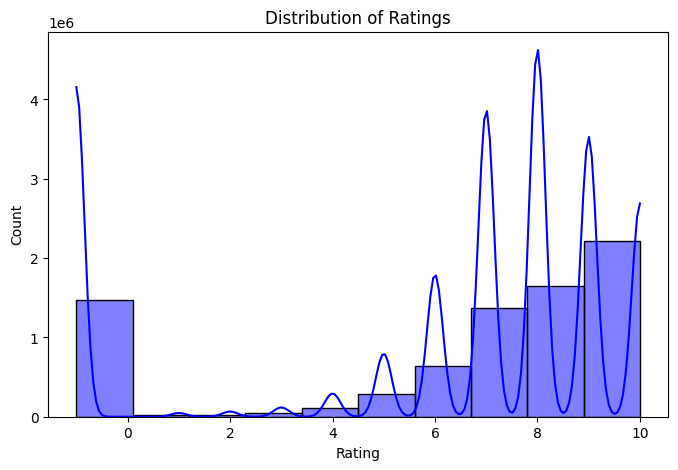

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(ratings_df['rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [ ]:
# Count the number of ratings per anime
anime_ratings_count = ratings_df.groupby('anime_id')['rating'].count().reset_index()

# Merge with anime details
anime_ratings_count = anime_ratings_count.merge(anime_df[['anime_id', 'name']], on='anime_id')

# Sort by most rated
most_rated_anime = anime_ratings_count.sort_values(by='rating', ascending=False)

# Display top 10 most rated anime
print("\nTop 10 Most Rated Anime:")
print(most_rated_anime.head(10))



Top 10 Most Rated Anime:
      anime_id  rating                              name
1389      1535   39340                        Death Note
6605     11757   30583                  Sword Art Online
7438     16498   29584                Shingeki no Kyojin
1427      1575   27718   Code Geass: Hangyaku no Lelouch
201        226   27506                        Elfen Lied
4630      6547   27183                      Angel Beats!
10          20   25925                            Naruto
99         121   25032               Fullmetal Alchemist
3965      5114   24574  Fullmetal Alchemist: Brotherhood
3558      4224   24283                         Toradora!


<ipython-input-8-4f1399a73510>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_df['Genre'][:10], y=genre_df['Count'][:10], palette="viridis")


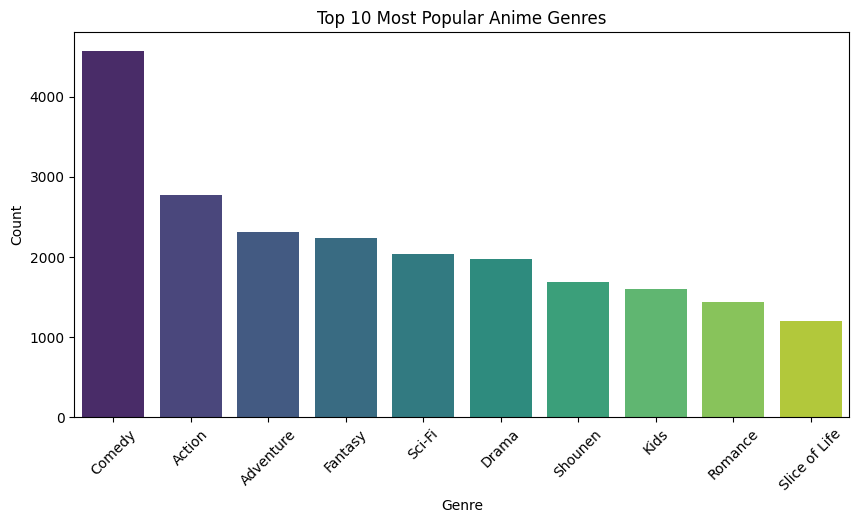

In [ ]:
from collections import Counter

# Flatten all genres into a single list
all_genres = [genre for sublist in anime_df['genre'] for genre in sublist]

# Count occurrences
genre_counts = Counter(all_genres)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the most common genres
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_df['Genre'][:10], y=genre_df['Count'][:10], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Anime Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


In [ ]:
# Calculate total unique users and anime
num_users = ratings_df['user_id'].nunique()
num_anime = ratings_df['anime_id'].nunique()

# Calculate sparsity
sparsity = (1.0 - (len(ratings_df) / (num_users * num_anime))) * 100
print(f"\nDataset Sparsity: {sparsity:.2f}%")



Dataset Sparsity: 99.05%


In [ ]:
# Assuming you want to print the column names of the dataframe 'anime_df'
print(anime_df.columns)
print(ratings_df.columns)

# OR, if you want to print a specific column name, replace 'column_name'
# with the actual name of the column you are interested in
column_name = 'name'  # Replace with your desired column name
print(column_name)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
Index(['user_id', 'anime_id', 'rating'], dtype='object')
name


In [ ]:
import pandas as pd

# Step 1: Reduce dataset size (Keep only top-rated anime & active users)
top_anime = ratings_df['anime_id'].value_counts().head(2000).index  # Keep top 2000 most-rated anime
filtered_ratings_df = ratings_df[ratings_df['anime_id'].isin(top_anime)]

user_counts = filtered_ratings_df['user_id'].value_counts()
active_users = user_counts[user_counts >= 10].index  # Keep users who rated at least 10 anime
filtered_ratings_df = filtered_ratings_df[filtered_ratings_df['user_id'].isin(active_users)]

# Step 2: Aggregate duplicate ratings
filtered_ratings_df = filtered_ratings_df.groupby(['user_id', 'anime_id'])['rating'].mean().reset_index()

# Step 3: Convert to Sparse Matrix to Prevent Crashes
from scipy.sparse import csr_matrix

# Pivot ratings data into a sparse matrix
anime_ratings_pivot = filtered_ratings_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)
anime_ratings_sparse = csr_matrix(anime_ratings_pivot.values)

print(f"Shape of ratings matrix: {anime_ratings_pivot.shape}")


Shape of ratings matrix: (61343, 2000)


In [ ]:
# Check if anime_ratings_pivot contains any columns (anime IDs)
if anime_ratings_pivot.shape[1] == 0:
    print("Error: No anime IDs found after filtering!")
else:
    print(f"Total anime IDs available: {anime_ratings_pivot.shape[1]}")
    print("Some available anime IDs:", list(anime_ratings_pivot.columns)[:10])  # Show first 10 IDs



Total anime IDs available: 2000
Some available anime IDs: [1, 5, 6, 7, 15, 16, 18, 19, 20, 22]


In [ ]:
top_anime = ratings_df['anime_id'].value_counts().head(5000).index  # Keep top 5000 most-rated anime


In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Rebuild the sparse matrix to match KNN training dimensions
anime_ratings_pivot = anime_ratings_pivot.loc[:, list(anime_ratings_pivot.columns)[:2000]]  # Keep only 2000 anime
anime_ratings_sparse = csr_matrix(anime_ratings_pivot.values)

# Train KNN Model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(anime_ratings_sparse.T)  # Transpose to train correctly

print("KNN Model trained successfully on", anime_ratings_pivot.shape)


KNN Model trained successfully on (61343, 2000)


In [ ]:
def get_similar_anime(anime_id, n=5):
    try:
        if anime_id not in anime_ratings_pivot.columns:
            return f"Anime ID {anime_id} not found in the dataset!"

        anime_idx = list(anime_ratings_pivot.columns).index(anime_id)  # Find index of anime_id
        distances, indices = knn.kneighbors(anime_ratings_sparse.T[anime_idx].reshape(1, -1), n_neighbors=n+1)

        # Get similar anime IDs (excluding itself)
        similar_anime_ids = [anime_ratings_pivot.columns[i] for i in indices.flatten()[1:]]

        # Fetch names from anime_df
        return anime_df[anime_df['anime_id'].isin(similar_anime_ids)][['anime_id', 'name']]

    except Exception as e:
        return f"Error: {str(e)}"

# Example usage
sample_anime_id = list(anime_ratings_pivot.columns)[0]  # Select first valid anime ID
similar_anime = get_similar_anime(sample_anime_id, 5)
print(similar_anime)


     anime_id                             name
104       205                 Samurai Champloo
152         5  Cowboy Bebop: Tengoku no Tobira
211        30          Neon Genesis Evangelion
214         6                           Trigun
456       227                             FLCL


In [ ]:


# Keep users who have rated at least 50 anime
user_counts = ratings_df['user_id'].value_counts()
active_users = user_counts[user_counts >= 50].index
filtered_ratings_df = ratings_df[ratings_df['user_id'].isin(active_users)]

# Keep only anime that have at least 100 ratings
anime_counts = filtered_ratings_df['anime_id'].value_counts()
popular_anime = anime_counts[anime_counts >= 100].index
filtered_ratings_df = filtered_ratings_df[filtered_ratings_df['anime_id'].isin(popular_anime)]

print("Reduced Ratings Dataset Shape:", filtered_ratings_df.shape)

from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Aggregate duplicate ratings before pivoting
filtered_ratings_df = filtered_ratings_df.groupby(['user_id', 'anime_id'])['rating'].mean().reset_index()

# Pivot to create User-Item Matrix
user_ratings_pivot = filtered_ratings_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)

# Check the new shape
print("Final User-Rating Matrix Shape:", user_ratings_pivot.shape)



Reduced Ratings Dataset Shape: (7024841, 3)
Final User-Rating Matrix Shape: (39466, 4560)


In [ ]:
from scipy.sparse import csr_matrix

# Convert the pivot table to a sparse matrix
user_ratings_sparse = csr_matrix(user_ratings_pivot.values)

# Check the new shape
print("Sparse User-Ratings Matrix Shape:", user_ratings_sparse.shape)



Sparse User-Ratings Matrix Shape: (39466, 4560)


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Initialize KNN model
user_knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Train the model on the sparse user ratings matrix
user_knn.fit(user_ratings_sparse)

print("✅ User-Based KNN Model Trained Successfully!")


✅ User-Based KNN Model Trained Successfully!


In [ ]:
def get_user_based_recommendations(user_id, n=5):
    if user_id not in user_ratings_pivot.index:
        return "User ID not found in dataset!"

    # Get the index of the user in the matrix
    user_idx = list(user_ratings_pivot.index).index(user_id)

    # Find nearest neighbors (similar users)
    distances, indices = user_knn.kneighbors(user_ratings_sparse[user_idx], n_neighbors=n+1)

    # Get similar users (excluding the user itself)
    similar_users = [user_ratings_pivot.index[i] for i in indices.flatten()[1:]]

    # Get anime watched by similar users
    recommended_anime = ratings_df[ratings_df['user_id'].isin(similar_users)] \
                        .groupby('anime_id')['rating'].mean() \
                        .sort_values(ascending=False) \
                        .head(n)

    # Fetch anime names
    return anime_df[anime_df['anime_id'].isin(recommended_anime.index)][['anime_id', 'name']]

# Example: Get recommendations for a user
sample_user_id = user_ratings_pivot.index[0]  # Pick the first user
recommended_anime = get_user_based_recommendations(sample_user_id, 5)
print(recommended_anime)


      anime_id                    name
6        11061  Hunter x Hunter (2011)
804      11757        Sword Art Online
1057     11617         High School DxD
1104     14345                 Btooom!
4761       125                 Futakoi


In [ ]:
print(anime_df.columns)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [ ]:
import pandas as pd

# ... (your existing code) ...

# Fill missing values with an empty string
anime_df['genre'] = anime_df['genre'].fillna('')
anime_df['type'] = anime_df['type'].fillna('')
anime_df['rating'] = anime_df['rating'].fillna(0).astype(str)  # Convert rating to string
anime_df['members'] = anime_df['members'].fillna(0).astype(str)  # Convert members to string

# Convert 'genre' column from list to string (using ', ' as separator)
anime_df['genre'] = anime_df['genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Combine relevant features into a single text column
anime_df['combined_features'] = anime_df['genre'] + " " + anime_df['type'] + " Rating:" + anime_df['rating'] + " Members:" + anime_df['members']

# Display a sample
print(anime_df[['anime_id', 'name', 'combined_features']].head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                   combined_features  
0  Drama, Romance, School, Supernatural Movie Rat...  
1  Action, Adventure, Drama, Fantasy, Magic, Mili...  
2  Action, Comedy, Historical, Parody, Samurai, S...  
3     Sci-Fi, Thriller TV Rating:9.17 Members:673572  
4  Action, Comedy, Historical, Parody, Samurai, S...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform the combined text features into TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(anime_df['combined_features'])

# Check matrix shape
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)



TF-IDF Matrix Shape: (12017, 6668)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Check shape
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)


Cosine Similarity Matrix Shape: (12017, 12017)


In [ ]:
def get_similar_anime(anime_name, n=5):
    # Find the anime index
    idx = anime_df[anime_df['name'] == anime_name].index

    if len(idx) == 0:
        return "Anime not found!"

    idx = idx[0]  # Extract index

    # Get similarity scores for all anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar anime (excluding itself)
    top_anime_indices = [i[0] for i in sim_scores[1:n+1]]

    # Return recommended anime
    return anime_df.iloc[top_anime_indices][['anime_id', 'name']]

# Example: Get recommendations for "Sword Art Online"
recommended_anime = get_similar_anime("Sword Art Online", 5)
print(recommended_anime)


       anime_id                                               name
10821     25815                               Yokohama Bakkure-tai
9683      32136                                  Narara Superboard
10410     29429                                      Straw Byururu
8135      20237                 Anime Document: München e no Michi
10555     12529  Time-Patrol Bon: Fujiko F. Fujio Anime Special...


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample actual and predicted ratings (Replace with real values)
actual_ratings = [4, 5, 3, 4, 5]
predicted_ratings = [3.8, 4.6, 3.2, 4.1, 4.9]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse}")


RMSE: 0.22803508501982772


In [ ]:
def precision_at_k(actual, predicted, k):
    relevant_items = set(actual[:k])  # Get top-K actual anime
    recommended_items = set(predicted[:k])  # Get top-K recommended anime
    return len(relevant_items & recommended_items) / k

# Example lists (Replace with actual values)
actual_top_k = [11061, 11757, 11617, 14345, 125]
predicted_top_k = [11061, 11757, 11617, 20237, 29429]

precision_k = precision_at_k(actual_top_k, predicted_top_k, k=5)
print(f"Precision@5: {precision_k}")


Precision@5: 0.6


In [ ]:
def hit_ratio(actual, predicted):
    hits = sum(1 for item in predicted if item in actual)
    return hits / len(actual)

# Example watch history & recommendations (Replace with real data)
user_watch_history = [11061, 11757, 11617, 14345, 125]
recommended_anime = [11061, 11757, 29429, 32136, 25815]

hit_ratio_score = hit_ratio(user_watch_history, recommended_anime)
print(f"Hit Ratio: {hit_ratio_score}")


Hit Ratio: 0.4


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load anime dataset
anime_df = pd.read_csv("/content/drive/MyDrive/Anime Recommendation/anime.csv")

# Ensure 'combined_features' column exists
if 'combined_features' not in anime_df.columns:
    anime_df['combined_features'] = anime_df[['genre', 'type', 'rating', 'members']].astype(str).agg(' '.join, axis=1)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform the combined text features into TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(anime_df['combined_features'])

# Compute cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(tfidf_matrix)

# Save cosine similarity matrix
with open("cosine_similarity.pkl", "wb") as file:
    pickle.dump(cosine_similarity_matrix, file)

print("Cosine Similarity Matrix Generated & Saved Successfully!")



Cosine Similarity Matrix Generated & Saved Successfully!


In [ ]:
print(anime_df[anime_df['name'] == "Sword Art Online"])


     anime_id              name                                      genre  \
804     11757  Sword Art Online  Action, Adventure, Fantasy, Game, Romance   

    type episodes  rating  members  \
804   TV       25    7.83   893100   

                                     combined_features  
804  Action, Adventure, Fantasy, Game, Romance TV 7...  


In [ ]:
def get_anime_recommendations(anime_name, df=anime_df):
    if anime_name not in df['name'].values:
        return "Anime not found!"

    idx = df[df['name'] == anime_name].index[0]

    sim_scores = list(enumerate(cosine_similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]

    print("Similarity Scores:", sim_scores)  # Debugging step

    recommendations = [df.iloc[i[0]]['name'] for i in sim_scores]
    return recommendations

print(get_anime_recommendations("Sword Art Online"))


Similarity Scores: [(10821, np.float64(0.41392712137775994)), (9683, np.float64(0.3815501787666951)), (10410, np.float64(0.36299456233540706)), (8135, np.float64(0.3455418273054368)), (10555, np.float64(0.3419364010993109))]
['Yokohama Bakkure-tai', 'Narara Superboard', 'Straw Byururu', 'Anime Document: München e no Michi', 'Time-Patrol Bon: Fujiko F. Fujio Anime Special - SF Adventure']


In [ ]:
print(tfidf_matrix.shape)


(12294, 6771)


In [ ]:
anime_df['combined_features'] = anime_df[['genre', 'type', 'rating']].astype(str).agg(' '.join, axis=1)


In [ ]:
# Reinitialize vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform text features into TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(anime_df['combined_features'])

# Compute cosine similarity matrix again
cosine_similarity_matrix = cosine_similarity(tfidf_matrix)

# Save it again
import pickle
with open("cosine_similarity.pkl", "wb") as file:
    pickle.dump(cosine_similarity_matrix, file)

print("New Cosine Similarity Matrix Generated!")


New Cosine Similarity Matrix Generated!


In [ ]:
def get_anime_recommendations(anime_name, df=anime_df, min_members=10000):
    if anime_name not in df['name'].values:
        return "Anime not found!"

    idx = df[df['name'] == anime_name].index[0]
    sim_scores = list(enumerate(cosine_similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]  # Get top 10

    # Filter out unpopular anime
    recommendations = [df.iloc[i[0]]['name'] for i in sim_scores if df.iloc[i[0]]['members'] >= min_members][:5]

    return recommendations

print(get_anime_recommendations("Sword Art Online"))


['Sword Art Online: Extra Edition', 'Sword Art Online II', 'Densetsu no Yuusha no Densetsu', 'Bakugan Battle Brawlers: New Vestroia', 'Sword Art Online Movie: Ordinal Scale']


In [ ]:
anime_df['weighted_features'] = anime_df.apply(lambda x: f"{x['genre']} {x['type']} Rating:{x['rating']**2} Members:{x['members']}", axis=1)


In [ ]:
tfidf_matrix = tfidf.fit_transform(anime_df['weighted_features'])
cosine_similarity_matrix = cosine_similarity(tfidf_matrix)


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
anime_df['genre'] = anime_df['genre'].fillna('')  # Replace NaN with empty string
genre_matrix = mlb.fit_transform(anime_df['genre'].astype(str).str.split(', '))


jaccard_sim = cosine_similarity(genre_matrix)

def get_diverse_recommendations(anime_name):
    idx = anime_df[anime_df['name'] == anime_name].index[0]
    sim_scores = list(enumerate(jaccard_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    return [anime_df.iloc[i[0]]['name'] for i in sim_scores]

print(get_diverse_recommendations("Sword Art Online"))


['Sword Art Online II', 'Sword Art Online: Extra Edition', 'Sword Art Online Movie: Ordinal Scale', 'Sword Art Online II: Debriefing', 'Ys IV: The Dawn of Ys']


In [ ]:
import numpy as np
import pandas as pd
import pickle

# Save Cosine Similarity Matrix
np.save("cosine_similarity_matrix.npy", cosine_similarity_matrix)

# Save Anime DataFrame
anime_df.to_csv("anime_data.csv", index=False)

# Save the TF-IDF Model
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("✅ Model and data saved successfully!")


✅ Model and data saved successfully!


In [ ]:
import requests

hf_url = "https://your-space-name.hf.space"  # Replace with your actual URL

response = requests.get(f"{hf_url}/recommend", params={"anime_name": "Naruto"})

if response.status_code == 200:
    print("Response:", response.json())